In [5]:

from dask.distributed import Client
client = Client(scheduler_file='/proj/jayeon/mpi/scheduler.json')  
client

<Client: 'tcp://203.247.189.223:34241' processes=5 threads=90, memory=419.10 GiB>

In [6]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
#import pystuff as ps
import cartopy.crs as ccrs
import cartopy.feature as cf
import seaborn as sns
import matplotlib.patches as patches
from scipy import stats
import cmocean
import glob
from cmcrameri import cm
from tqdm.notebook import tqdm_notebook

In [7]:
import warnings
warnings.simplefilter(action='ignore')

In [10]:
# load variables at each periods 
h_scaling = xr.open_dataset('/proj/shared_data/awicm3/Paper/TCo1279/Code/Figure9/h_scaling.nc')['h_scaling']
m_scaling = xr.open_dataset('/proj/shared_data/awicm3/Paper/TCo1279/Code/Figure9/m_scaling.nc')['m_scaling']
l_scaling = xr.open_dataset('/proj/shared_data/awicm3/Paper/TCo1279/Code/Figure9/l_scaling.nc')['l_scaling']

h_2000 = xr.open_dataset('/proj/shared_data/awicm3/Paper/TCo1279/Code/Figure9/t1279.hcc.m.nc')['hcc']
m_2000 = xr.open_dataset('/proj/shared_data/awicm3/Paper/TCo1279/Code/Figure9/t1279.mcc.m.nc')['mcc']
l_2000 = xr.open_dataset('/proj/shared_data/awicm3/Paper/TCo1279/Code/Figure9/t1279.lcc.m.nc')['lcc']

In [11]:
h_2000 = h_2000.squeeze() 
m_2000 = m_2000.squeeze()
l_2000 = l_2000.squeeze() 

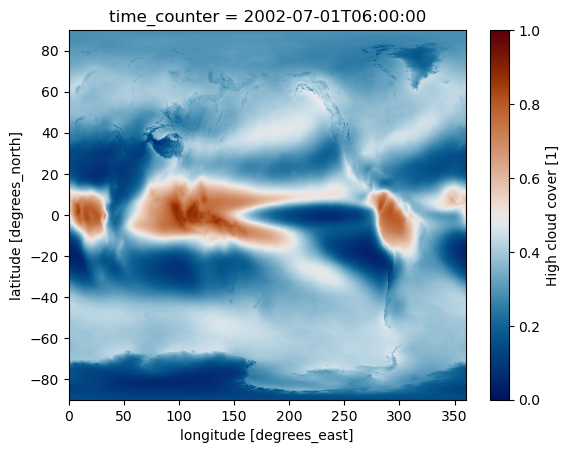

In [12]:
h_2000.plot(vmin=0, vmax=1, cmap=cm.vik)

  0%|          | 0/6 [00:00<?, ?it/s]

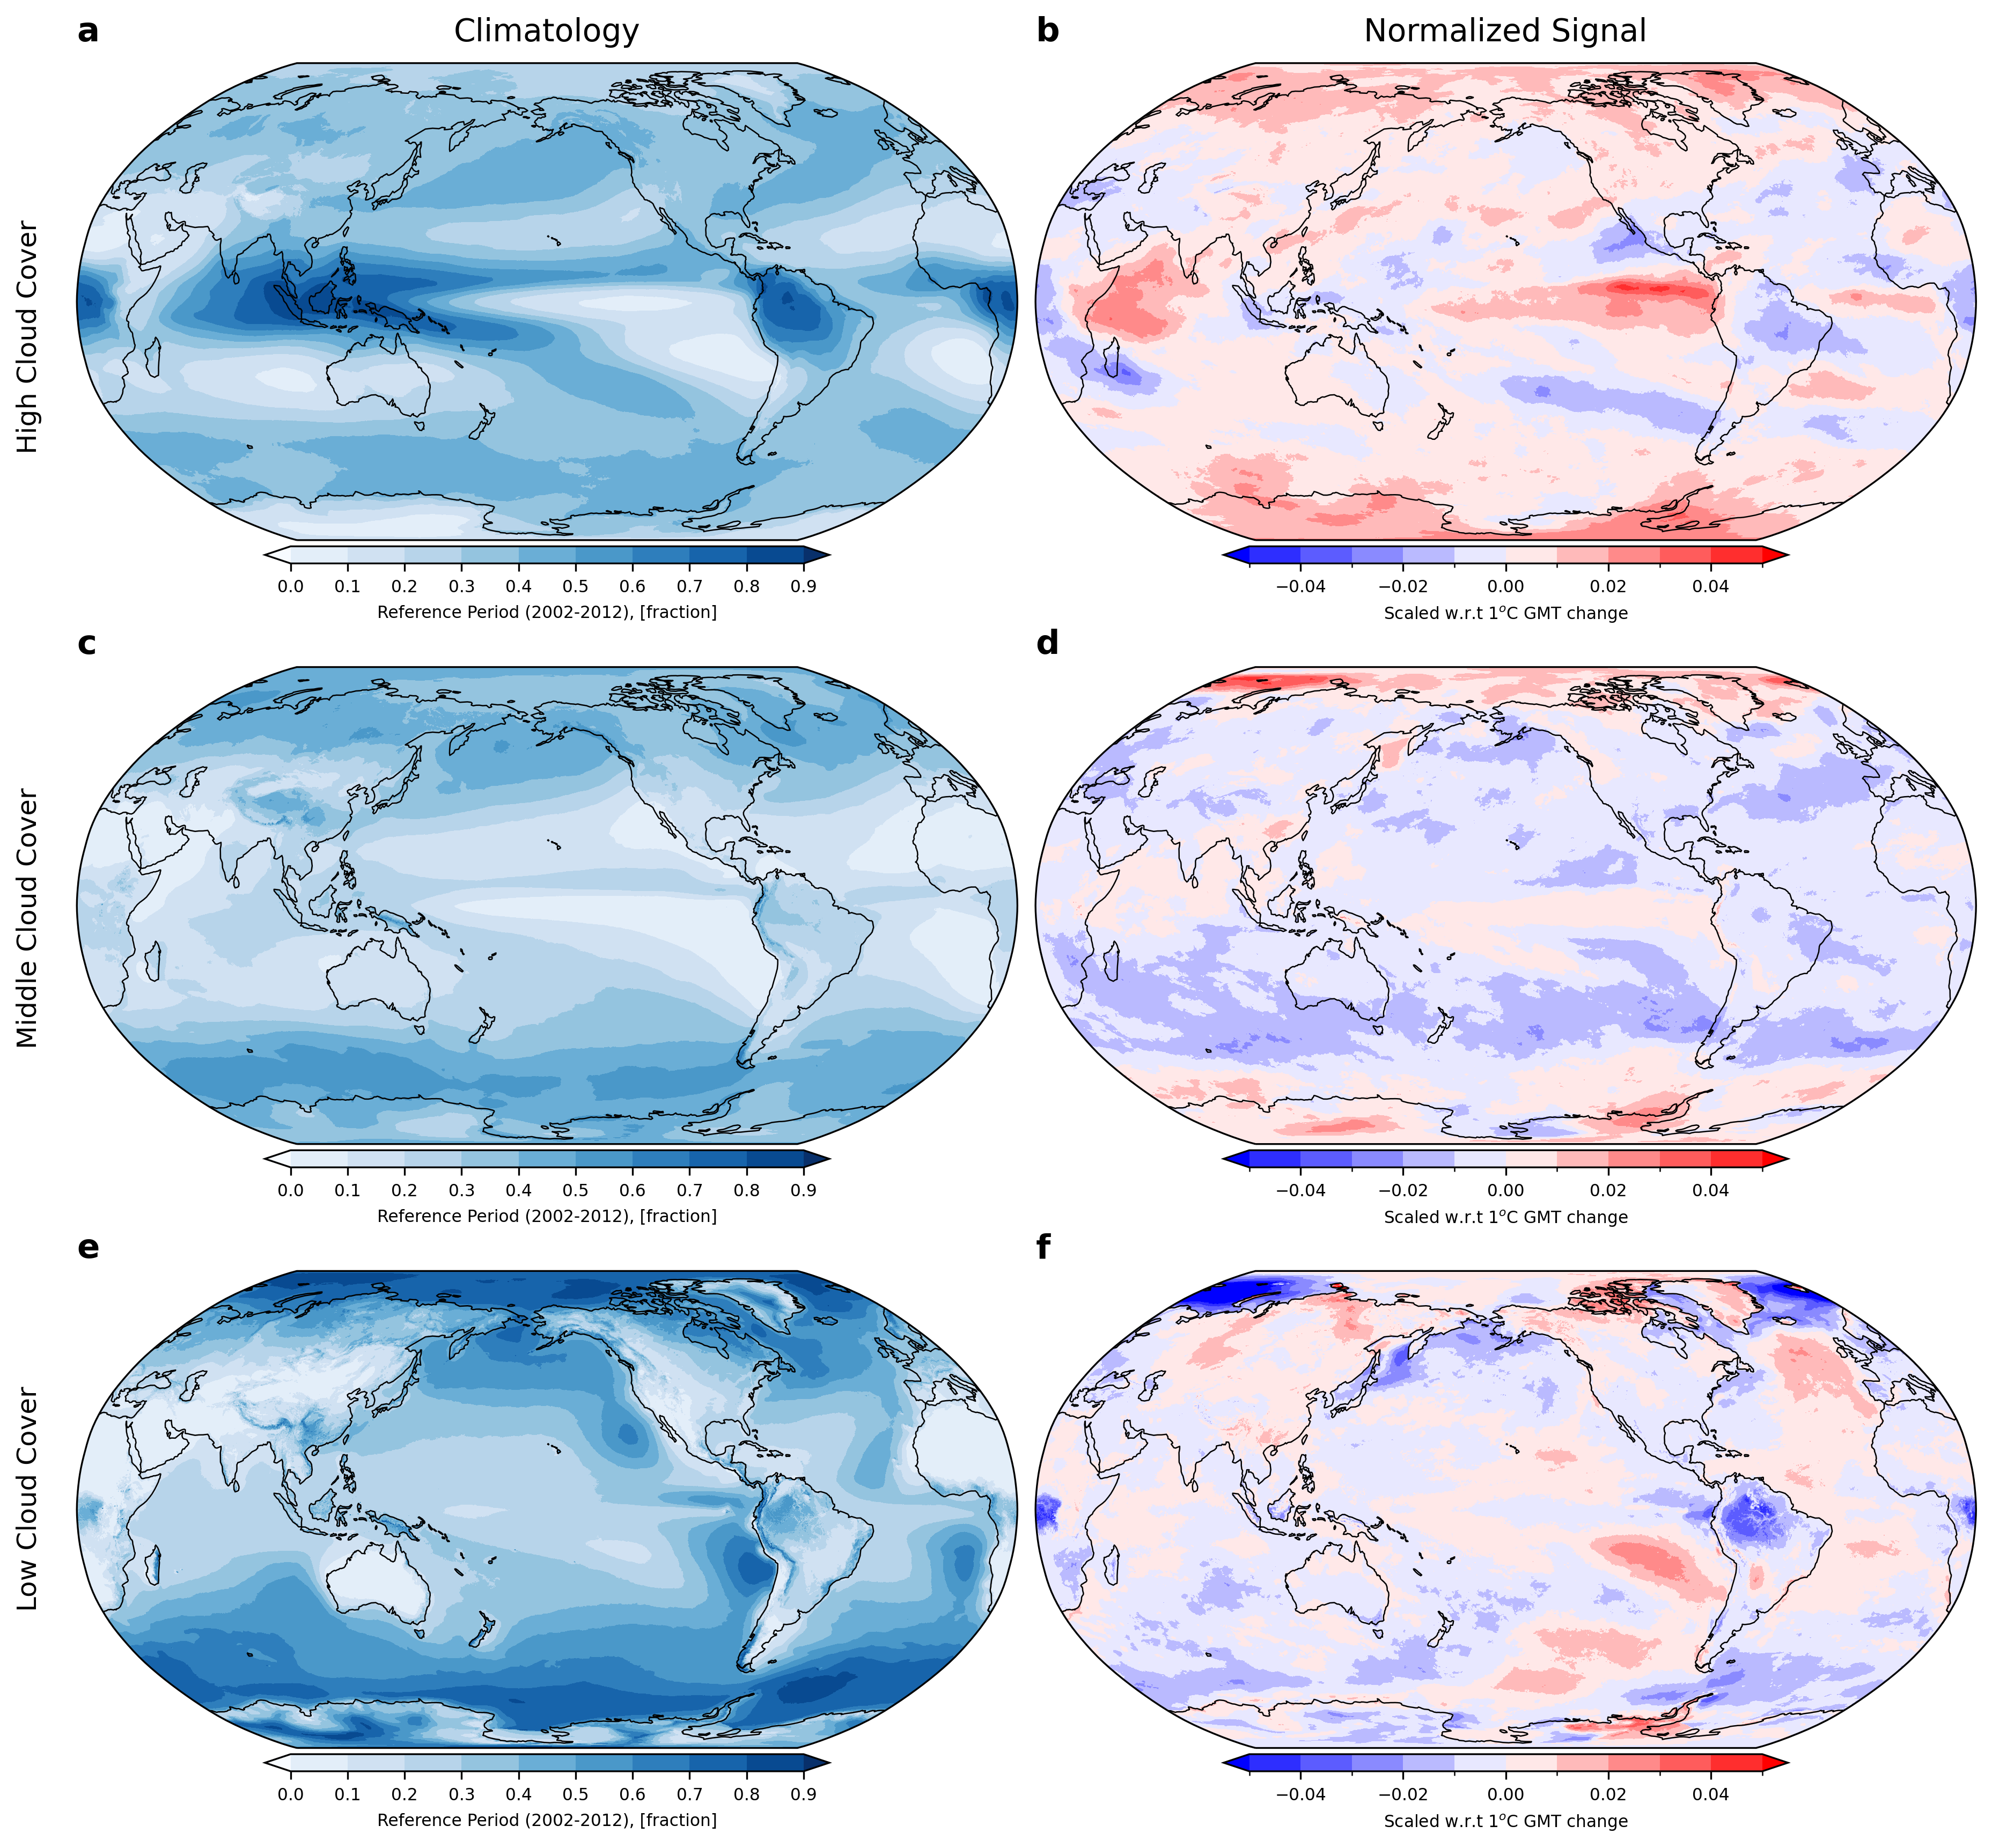

In [13]:
plt.rcParams.update({'font.size': 7.5})
fig,ax = plt.subplots(3,2,figsize=(18.5, 19), dpi=300, facecolor='w', edgecolor='k',subplot_kw={'projection': ccrs.Robinson(central_longitude=200)})

import cmocean
titlesM = ['Climatology', 'Normalized Signal']
titlesL = ['$\mathbf{a}$', '$\mathbf{b}$', '$\mathbf{c}$', '$\mathbf{d}$', '$\mathbf{e}$', '$\mathbf{f}$']
labels = ['High Cloud Cover', 'Middle Cloud Cover', 'Low Cloud Cover']

fields=[ h_2000,  h_scaling, 
         m_2000, m_scaling,  
         l_2000, l_scaling]

levels=[np.arange(0,1,0.1), np.arange(-0.05,0.06,0.01), 
        np.arange(0,1,0.1), np.arange(-0.05,0.06,0.01),  
        np.arange(0,1,0.1), np.arange(-0.05,0.06,0.01)]
cbar=['Blues', 'bwr',
      'Blues', 'bwr',   
      'Blues', 'bwr']
units=[ 'Reference Period (2002-2012), [fraction]', 'Scaled w.r.t 1$^{o}$C GMT change',
        'Reference Period (2002-2012), [fraction]', 'Scaled w.r.t 1$^{o}$C GMT change', 
        'Reference Period (2002-2012), [fraction]', 'Scaled w.r.t 1$^{o}$C GMT change', ]

for i,a in enumerate(tqdm_notebook(ax.flat)) :
      clabel=('%s'%units[i])
      cbar_kwargs={'orientation':'horizontal','pad':0.01,'shrink':0.6, 'label':clabel, 'aspect':33}
      fields[i].plot.contourf(ax=a,transform=ccrs.PlateCarree(),levels=levels[i],cbar_kwargs=cbar_kwargs,cmap=cbar[i], extend='both')
      #a.add_feature(cf.LAND,color='grey')
      a.coastlines(linewidth=0.6,color='black')
      a.set_global()  

for i, label in enumerate(labels):
    fig.text(0.29, 0.86 - i * 0.19, label, transform=fig.transFigure, fontsize=12, va='center', ha='center', rotation=90)
   
for i, a in enumerate(ax.flat):
    a.set_title('%s' % titlesL[i], size=15, loc='left')

    if i <= 1:
        a.set_title('%s' % (titlesM[i]), size=14, y=1.0, pad=10)
    else:
        a.set_title('')
            
plt.tight_layout(rect=[0.3, 0.36, 0.95, 0.97])
plt.savefig('/proj/shared_data/awicm3/Paper/TCo1279/Code/Figure9/Figure9.png',dpi=500, bbox_inches = 'tight')